# Descriptive Statistics

Descriptive statistics are used to **summarize and organize data** so it can be easily understood. These statistics include measures of:

- **Central tendency** (e.g., mean, median, mode), which indicate the center or typical value in a dataset.
- **Dispersion or variability** (e.g., range, variance, standard deviation), which indicate how spread out the data is.
- **Shape of the distribution** (e.g., skewness and kurtosis), which help us understand the data’s symmetry and peakiness.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = pd.Series([12, 15, 14, 10, 18, 20, 21, 17, 15, 19, 30, 35, 22, 13, 16])

## Central Tendency

These are values that represent the "center" or "typical value" of the dataset.


In [6]:
#The mean is the sum of all values divided by the number of values.  
#It is sensitive to outliers (e.g., unusually high or low values).

mean_val = data.mean().round(2)
print(f"Mean: {mean_val}")


Mean: 18.47


In [9]:
"""The median is the middle value when the data is sorted.  
If the dataset has an odd number of values, it's the center one;  
if even, it's the average of the two center values.  
The median is **robust to outliers**."""

median_val = data.median()
print(f"Median: {median_val}")



Median: 17.0


In [10]:
"""The mode is the value(s) that appear most frequently.  
There can be multiple modes or none (if all values are unique)."""
mode_val = data.mode()
print(f"Mode: {list(mode_val)}")

Mode: [15]


## Dispersion

These metrics tell us **how spread out** the data is around the central values.


In [12]:
"""Range is the difference between the maximum and minimum values.
It gives a quick sense of the spread but is highly affected by outliers.
"""
data_range = data.max() - data.min()
print(f"Range: {data_range}")

Range: 25


- **Variance** measures the average squared deviation from the mean.
- **Standard Deviation (SD)** is the square root of the variance. It is in the same units as the data.
These help us understand **how much the data varies** from the average value.

In [16]:
variance = data.var()
std_dev = data.std()
print(f"Variance: {variance}, Standard Deviation: {std_dev}")

Variance: 44.55238095238094, Standard Deviation: 6.674756995755047


## Percentiles & IQR

- A **percentile** indicates the value below which a given percentage of observations fall.
- The **25th percentile (Q1)** is the value below which 25% of the data lies.
- The **75th percentile (Q3)** marks the 75% threshold.
- The **Interquartile Range (IQR)** = Q3 − Q1 and represents the middle 50% of the data.

IQR is helpful for detecting outliers and understanding the concentration of the dataset.


In [17]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Q3 - Q1): {iqr}")
print(f"90th percentile: {data.quantile(0.9)}")


Q1 (25th percentile): 14.5
Q3 (75th percentile): 20.5
IQR (Q3 - Q1): 6.0
90th percentile: 26.799999999999997


## Shape of the Distribution

- **Skewness** measures the **asymmetry** of the distribution.
  - A skewness > 0 indicates a right-skewed (positively skewed) distribution.
  - A skewness < 0 indicates a left-skewed (negatively skewed) distribution.
- **Kurtosis** measures the **tailedness** (i.e., how heavy or light the tails are compared to a normal distribution).
  - A normal distribution has a kurtosis of 0 (excess kurtosis).
  - High kurtosis = heavy tails (more outliers), low kurtosis = light tails.


In [18]:
skew = data.skew()
kurt = data.kurt()
print(f"Skewness: {skew}, Kurtosis: {kurt}")


Skewness: 1.3542195469181573, Kurtosis: 1.829386749436778


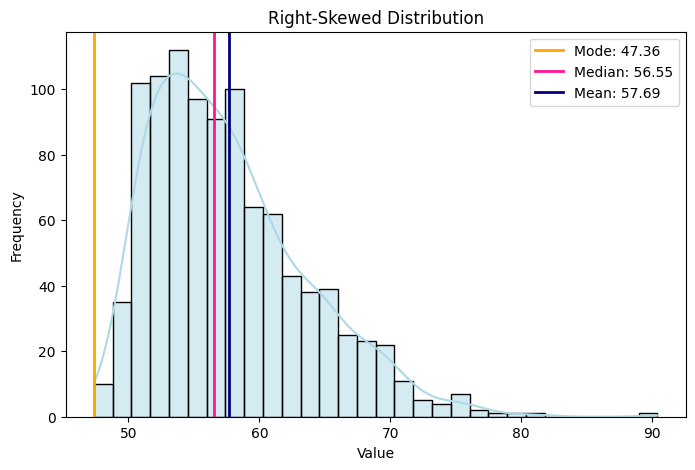

In [27]:
from scipy.stats import skewnorm

# Right skewed data: a > 0
np.random.seed(42)
right_skewed = skewnorm.rvs(a=8, loc=50, scale=10, size=1000)
data_right = pd.Series(right_skewed)

# Central tendency
mean_r = data_right.mean()
median_r = data_right.median()
mode_r = data_right.mode().iloc[0]

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data_right, bins=30, kde=True, color="lightblue")

# Lines
plt.axvline(mode_r, color='orange', linestyle='-', linewidth=2, label=f"Mode: {mode_r:.2f}")
plt.axvline(median_r, color='deeppink', linestyle='-', linewidth=2, label=f"Median: {median_r:.2f}")
plt.axvline(mean_r, color='navy', linestyle='-', linewidth=2, label=f"Mean: {mean_r:.2f}")

plt.title("Right-Skewed Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


- In a **right-skewed** distribution, the long tail is on the right → mean > median > mode.
- In a **left-skewed** distribution, the tail is on the left → mean < median < mode.
- Skewness affects the relationship between the three measures of central tendency.


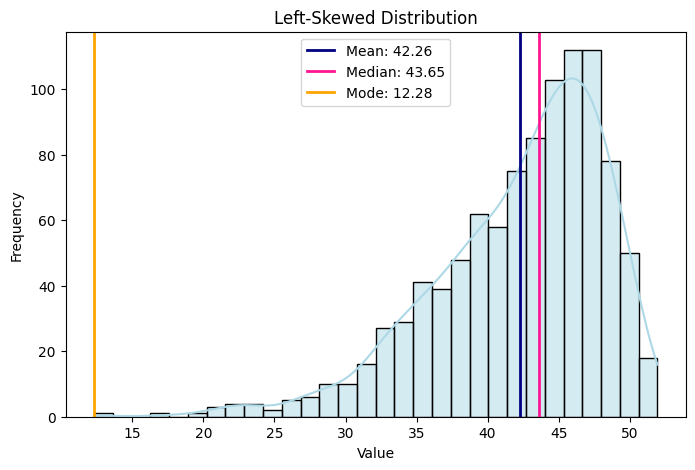

In [26]:
# Left skewed data: a < 0
left_skewed = skewnorm.rvs(a=-8, loc=50, scale=10, size=1000)
data_left = pd.Series(left_skewed)

# Central tendency
mean_l = data_left.mean()
median_l = data_left.median()
mode_l = data_left.mode().iloc[0]

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data_left, bins=30, kde=True, color="lightblue")

# Lines
plt.axvline(mean_l, color='navy', linestyle='-', linewidth=2, label=f"Mean: {mean_l:.2f}")
plt.axvline(median_l, color='deeppink', linestyle='-', linewidth=2, label=f"Median: {median_l:.2f}")
plt.axvline(mode_l, color='orange', linestyle='-', linewidth=2, label=f"Mode: {mode_l:.2f}")

plt.title("Left-Skewed Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


- In a **left-skewed distribution**, the **mean is typically less than the median**, and the **mode is often the largest**.
- The **mean is pulled toward the tail**, which is why it shifts left.
- Visualizing these lines helps highlight the difference between each central tendency measure.


## Visualizing the Data

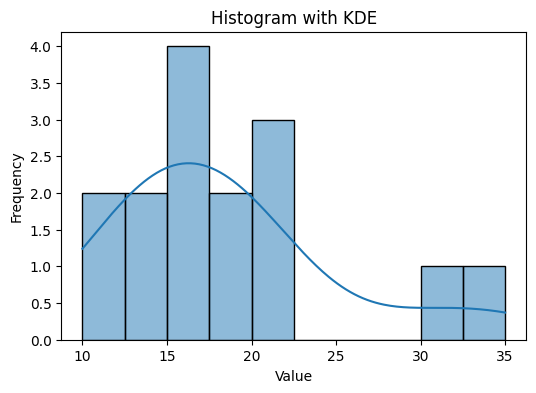

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(data, kde=True, bins=10)
plt.title('Histogram with KDE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


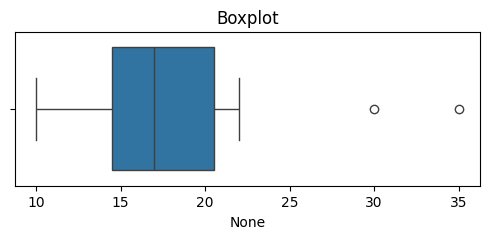

In [20]:
plt.figure(figsize=(6,2))
sns.boxplot(x=data)
plt.title('Boxplot')
plt.show()


- The **mean** is useful for symmetric distributions, but the **median** is better when data has outliers.
- **Standard deviation** and **IQR** help quantify spread.
- **Skewness** and **kurtosis** describe the shape of the distribution.
- Use **histograms** for distribution and **boxplots** for spotting outliers and spread.


## Example 2:

In [21]:
from scipy.stats import skewnorm

# Generate left-skewed data
np.random.seed(42)
left_skewed_data = skewnorm.rvs(a=-5, loc=50, scale=10, size=1000)  # a < 0 creates left skew
data2 = pd.Series(left_skewed_data)


In [22]:
mean_ = data2.mean()
median_ = data2.median()
mode_ = data2.mode().iloc[0]  # pick first if multiple modes

print(f"Mean: {mean_:.2f}")
print(f"Median: {median_:.2f}")
print(f"Mode: {mode_:.2f}")


Mean: 42.28
Median: 43.32
Mode: 15.65


### Pandas functionality

In [28]:
# Sample realistic DataFrame
np.random.seed(0)
df = pd.DataFrame({
    'age': np.random.randint(18, 65, size=100),
    'salary': np.random.normal(60000, 15000, size=100).round(2),
    'experience_years': np.random.normal(7, 3, size=100).clip(0).round(1),
    'department': np.random.choice(['Sales', 'Engineering', 'HR'], size=100)
})

df.head()


,age,salary,experience_years,department
0,62,60403.04,8.4,Engineering
1,18,75837.56,6.9,Sales
2,21,58902.25,5.3,Sales
3,21,50014.19,7.8,Engineering
4,57,59338.31,6.9,Sales


In [29]:
df.describe()


,age,salary,experience_years
count,100.000000,100.000000,100.000000
mean,38.800000,58983.503000,7.199000
std,13.893535,14509.264326,3.039487
min,18.000000,24929.310000,0.000000
25%,27.000000,49956.970000,5.450000
50%,37.500000,59120.280000,7.000000
75%,53.000000,66926.590000,8.950000
max,64.000000,94916.070000,15.000000


What does describe() do?
- `count`: Number of non-null entries
- `mean`, `std`: Central tendency and spread
- `min`, `max`: Range of the data
- `25%`, `50%`, `75%`: Quartiles used to calculate IQR

These values are **column-wise** and help spot **outliers, skew, and scaling issues**.


In [30]:
df.describe(include='all')

,age,salary,experience_years,department
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,Engineering
freq,NaN,NaN,NaN,36
mean,38.800000,58983.503000,7.199000,NaN
std,13.893535,14509.264326,3.039487,NaN
min,18.000000,24929.310000,0.000000,NaN
25%,27.000000,49956.970000,5.450000,NaN
50%,37.500000,59120.280000,7.000000,NaN
75%,53.000000,66926.590000,8.950000,NaN


Why is describe() not always enough?
- It doesn’t show **missing values** (use `df.isnull().sum()`)
- It doesn’t show **skewness, kurtosis**, or **correlations**
- It shows **summary stats**, but not relationships between columns


## Conclusion
While `describe()` is often the starting point, true data understanding comes from combining:
- `.info()` for types and memory
- `.isnull()` for data quality
- `.value_counts()` and `.nunique()` for categorical data
- `.groupby()` and `.agg()` for comparisons
- `.corr()` for feature selection